# **CPSC 392 Final Project: Speed Dating Data Analysis**

**Leah Zahn and Eli Annoni**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #model evaluation

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, f1_score, recall_score, plot_roc_curve, precision_score, roc_auc_score

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/eannoni/cpsc392/main/speed-dating-data.csv")

df

,id,pid,gender,int_corr,samerace,age,field,field_cd,race,imprace,...,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,dec,dec_o,match
0,1,11.0,0,0.14,0,21.0,Law,1.0,4.0,2.0,...,8.0,8.0,8.0,8.0,6.0,7.0,4.0,1,0,0
1,1,12.0,0,0.54,0,21.0,Law,1.0,4.0,2.0,...,8.0,10.0,7.0,7.0,5.0,8.0,4.0,1,0,0
2,1,13.0,0,0.16,1,21.0,Law,1.0,4.0,2.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,1
3,1,14.0,0,0.61,0,21.0,Law,1.0,4.0,2.0,...,8.0,9.0,8.0,9.0,8.0,7.0,7.0,1,1,1
4,1,15.0,0,0.21,0,21.0,Law,1.0,4.0,2.0,...,7.0,9.0,6.0,9.0,7.0,8.0,6.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8315,552,526.0,1,0.64,0,25.0,Climate Dynamics,18.0,2.0,1.0,...,5.0,3.0,2.0,6.0,5.0,6.0,1.0,0,1,0
8316,552,527.0,1,0.71,0,25.0,Climate Dynamics,18.0,2.0,1.0,...,3.0,7.0,3.0,7.0,2.0,2.0,2.0,0,0,0
8317,552,528.0,1,-0.46,0,25.0,Climate Dynamics,18.0,2.0,1.0,...,1.0,2.0,2.0,2.0,1.0,2.0,1.0,0,0,0
8318,552,529.0,1,0.62,0,25.0,Climate Dynamics,18.0,2.0,1.0,...,7.0,5.0,5.0,3.0,6.0,6.0,4.0,0,1,0


# Question 1: Using the predictors of gender, age, age_o and interest_correlate, which predictor will have the most significant coefficient for predicting whether a match will be made?

## a) Analysis Code

In [ ]:
q1 = ["gender", "age", "age_o", "int_corr", "match"]
q1_predictors = ["gender", "age", "age_o", "int_corr"]
q1_continuous = ["age", "age_o", "int_corr"]
q1_df = df[q1]

q1_df.dropna(inplace = True)
q1_df.reset_index(inplace = True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(q1_df[["gender", "age", "age_o", "int_corr"]], q1_df["match"], test_size = 0.2, random_state = 16)

z = StandardScaler()

q1_continuous = ["age", "age_o", "int_corr"]
X_train[q1_continuous] = z.fit_transform(X_train[q1_continuous])
X_test[q1_continuous] = z.transform(X_test[q1_continuous])

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# accuracy for training data
acc_train = accuracy_score(y_train, y_pred_train)
print("Accuracy for training: ", acc_train)

# accuracy for test data
acc_test = accuracy_score(y_test, y_pred_test)
print("Accuracy for test: ", acc_test)

Accuracy for training:  0.8367597422522246
Accuracy for test:  0.8294478527607362


In [ ]:
coef = pd.DataFrame({"Coefs": lr.coef_[0], "Predictors": q1_predictors})
coef

,Coefs,Predictors
0,0.030826,gender
1,-0.099350,age
2,-0.085492,age_o
3,0.082654,int_corr


## b) Analysis

Based on the table of the coefficient for each predictor, the predictor with the greatest impact on whether a match is made is age. Age has the coefficient that was greatest in magnitude compared to the coefficients for gender, age of partner, and correlation of interests. The age of the partner and correlation between interests also had large coefficients, but they were not as large as the one for age. This indicates that as the age of the participant increases by 1 year, the log odds of a match being made change by the greatest amount. In this case, as age increases by 1 year, the log odds of a match being made decrease by 0.099.

We also compared the training and testing accuracies to check for overfitting during analysis and found that the model performed pretty well, with an accuracy of over 0.8, and there was only a very small change in the accuracy for the test accuracy compared to the training accuracy. This means that the model was not overfit.

## c) Graphs

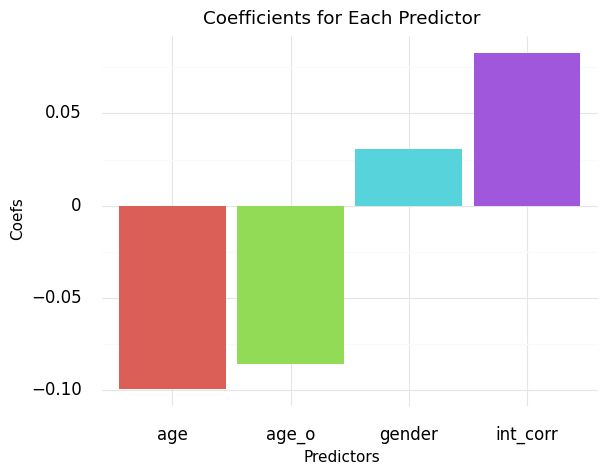

<ggplot: (8791217240586)>

In [ ]:
(ggplot(coef, aes(x = "Predictors", y = "Coefs", fill = "Predictors")) + geom_bar(stat = "identity")
 + theme_minimal()
 + theme(legend_position = "none", axis_text = element_text(size=12, color = "black"))
 + ggtitle("Coefficients for Each Predictor"))

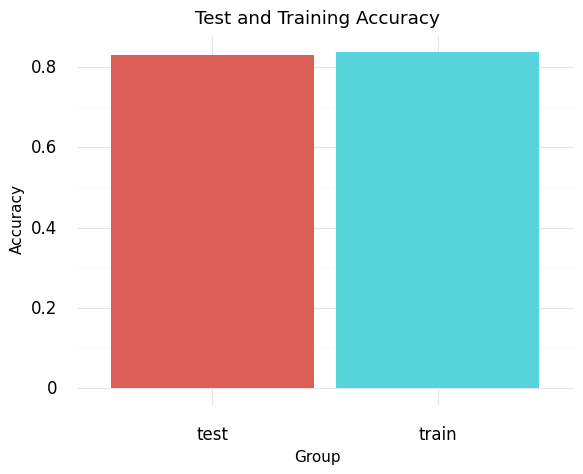

<ggplot: (8791220100593)>

In [ ]:
accuracies = [acc_train, acc_test]
acc_df = pd.DataFrame({"Group" : ["train", "test"], "Accuracy" : accuracies})

(ggplot(acc_df, aes(x = "Group", y = "Accuracy", fill = "Group")) + geom_bar(stat = "identity")
+ ggtitle("Test and Training Accuracy") + theme_minimal() + theme(axis_text = element_text(size=12, color = "black"), legend_position = "none"))

# Question 2: When considering a person's self rating of their attractiveness, their partner's rating of their attractiveness, and a person's preference of attractiveness, what clusters emerge and what characterizes these clusters?

## a) Analysis code

In [ ]:
q2_feat = ["attr", "attr_o", "pf_o_att"]
q2_df = df[q2_feat]

q2_df.dropna(inplace = True)
q2_df.reset_index(inplace = True)

q2_df

,index,attr,attr_o,pf_o_att
0,0,6.0,6.0,35.0
1,1,7.0,7.0,60.0
2,2,5.0,10.0,19.0
3,3,7.0,7.0,30.0
4,4,5.0,8.0,30.0
...,...,...,...,...
7973,8315,3.0,10.0,10.0
7974,8316,4.0,6.0,50.0
7975,8317,4.0,2.0,40.0
7976,8318,4.0,5.0,10.0


In [ ]:
z = StandardScaler()
q2_df[q2_feat] = z.fit_transform(q2_df[q2_feat])
q2_df

,index,attr,attr_o,pf_o_att
0,0,-0.094887,-0.097021,1.008377
1,1,0.417854,0.416300,3.008705
2,2,-0.607628,1.956263,-0.271833
3,3,0.417854,0.416300,0.608312
4,4,-0.607628,0.929621,0.608312
...,...,...,...,...
7973,8315,-1.633111,1.956263,-0.991951
7974,8316,-1.120370,-0.097021,2.208574
7975,8317,-1.120370,-2.150306,1.408443
7976,8318,-1.120370,-0.610343,-0.991951


In [ ]:
sils = []

for k in range(2,7):
  GM = GaussianMixture(n_components = k)
  GM.fit(q2_df[q2_feat])
  pred = GM.predict(q2_df[q2_feat])
  print("silhouette for k =", k, ": ", silhouette_score(q2_df[q2_feat],pred))
  sils.append(silhouette_score(q2_df[q2_feat],pred))

chosen = np.argmax(sils) + 2
finalGM = GaussianMixture(n_components = chosen)
finalGM.fit(q2_df[q2_feat])
GMpred = finalGM.predict(q2_df[q2_feat])
print("GM silhouette: ", silhouette_score(q2_df[q2_feat],GMpred), " for ", chosen, " clusters")

silhouette for k = 2 :  0.3184778321416224
silhouette for k = 3 :  0.24440802813573134
silhouette for k = 4 :  0.2470935923286297
silhouette for k = 5 :  0.22076786485795397
silhouette for k = 6 :  0.20930031665630536
GM silhouette:  0.31807137660524576  for  2  clusters


## b) Analysis

GMM was used for this analysis due to its flexibility in terms of the shape and variance of the clusters along with its relative computational efficiency. Based on the initial graphs of the data, the clusters are not very clear, making them have very poor separation. This means that DBSCAN would likely have had a bad time with this data.

When implementing GMM, we first determined the number of clusters by calculating the silhouette score for a range of k-values, and found that the best silhouette score resulted when 2 clusters were formed. The silhouette score was only 0.33 for this model, which indicates that the clusters are not very cohesive or separated.

When looking at the clusters formed, they are not very distinct. For example, when looking at the graph of the partner's rating of the persons attractiveness vs their own rating of their attractiveness (attr_0 vs attr), the data appears to basically be random, with the two clusters both spread out across the graph. Stronger characteristics emerge across the next two graphs, mainly based on preference of attractiveness.

The first cluster, shown in yellow, was a very high density cluster of people with lower preference of attractiveness. This cluster was spread across the entire range of self-rated and partner-rater attractiveness.

The second cluster, shown in purple, was a lower density cluster of people with higher preference of attractiveness. This cluster was fairly evenly spread across partner-rated attractiveness, with slightly more density for a higher partner-rated attractiveness. For self-rated attractiveness, those with a higher preference of attractiveness rated themselves slightly higher for their own attractiveness. This trend generally makes sense, since people who are looking to date more attractive people probably think of themselves as more attractive.



## c) Graphs

### Before clustering:

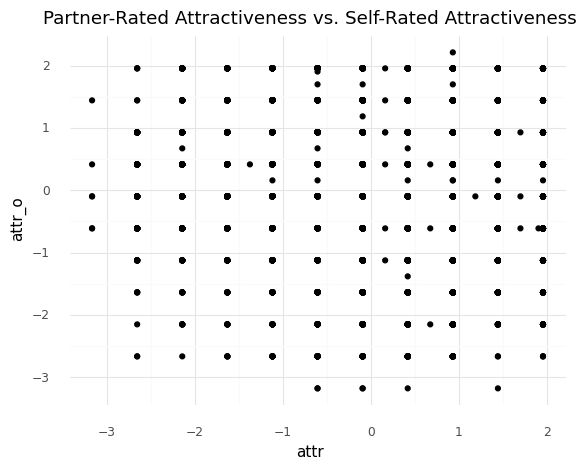

<ggplot: (8791217249597)>

In [ ]:
(ggplot(q2_df, aes(x = "attr", y = "attr_o")) + geom_point() + theme_minimal() + ggtitle("Partner-Rated Attractiveness vs. Self-Rated Attractiveness"))

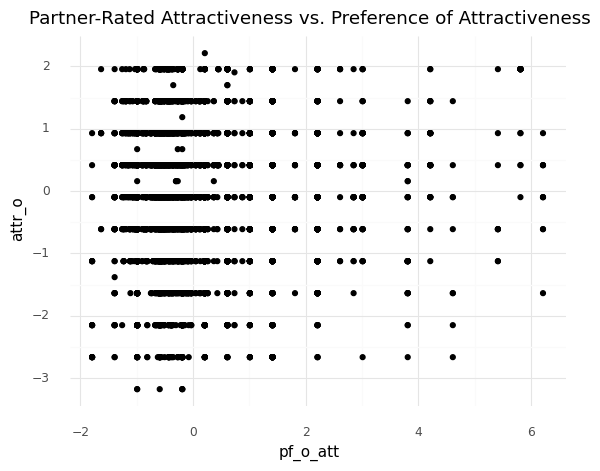

<ggplot: (8791216613114)>

In [ ]:
(ggplot(q2_df, aes(x = "pf_o_att", y = "attr_o")) + geom_point() + theme_minimal() + ggtitle("Partner-Rated Attractiveness vs. Preference of Attractiveness"))

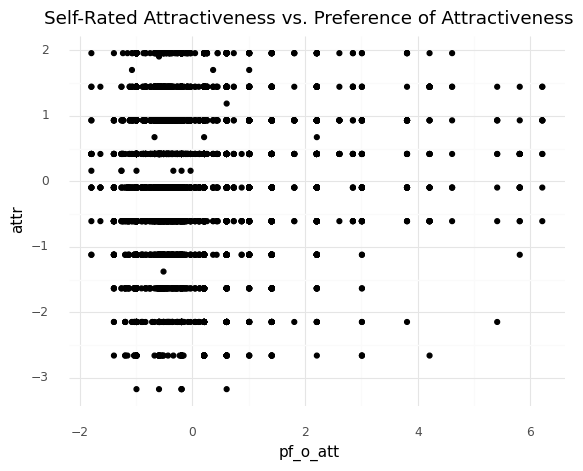

<ggplot: (8791217275886)>

In [ ]:
(ggplot(q2_df, aes(x = "pf_o_att", y = "attr")) + geom_point() + theme_minimal() + ggtitle("Self-Rated Attractiveness vs. Preference of Attractiveness"))

### After clustering:

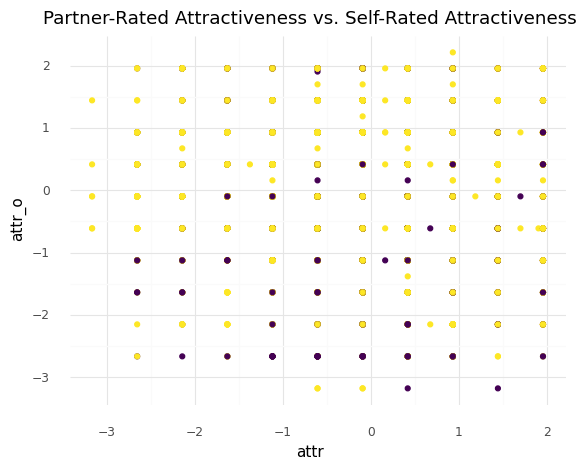

<ggplot: (8791217285331)>

In [ ]:
(ggplot(q2_df, aes(x = "attr", y = "attr_o", color = GMpred)) + geom_point() + theme_minimal() +
 theme(legend_position = "none", panel_background = element_rect(fill = "white")) +
 ggtitle("Partner-Rated Attractiveness vs. Self-Rated Attractiveness"))

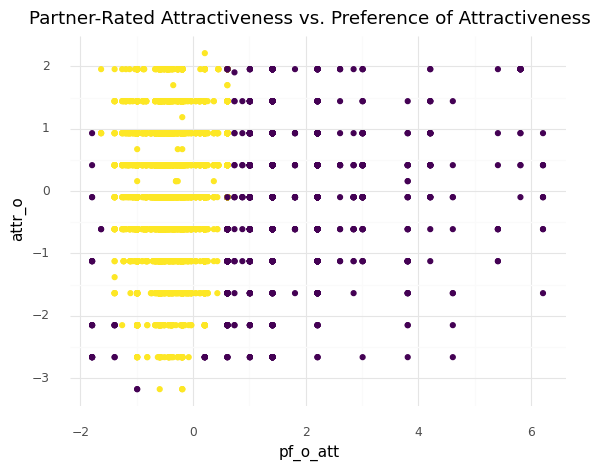

<ggplot: (8791220102325)>

In [ ]:
(ggplot(q2_df, aes(x = "pf_o_att", y = "attr_o", color = GMpred)) + geom_point() +
 theme_minimal() + theme(legend_position = "none", panel_background = element_rect(fill = "white")) +
 ggtitle("Partner-Rated Attractiveness vs. Preference of Attractiveness"))

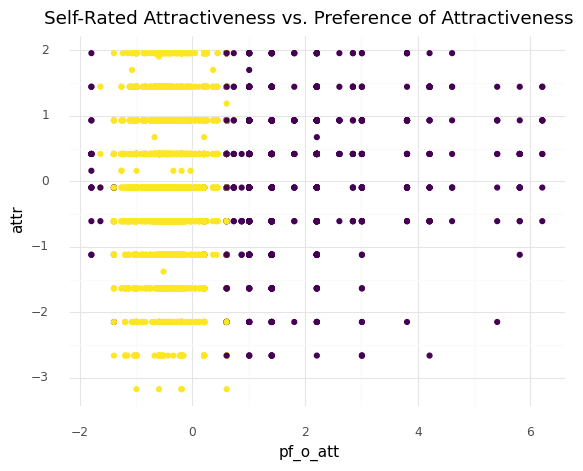

<ggplot: (8791215980412)>

In [ ]:
(ggplot(q2_df, aes(x = "pf_o_att", y = "attr", color = GMpred)) + geom_point() +
 theme_minimal() + theme(legend_position = "none", panel_background = element_rect(fill = "white")) +
 ggtitle("Self-Rated Attractiveness vs. Preference of Attractiveness"))

# Question 3: When comparing a model using attractive_o, sincere_o, intelligence_o, funny_o, ambitious_o, and sharedinterestso to predict decision_o to a PCA model using the same features and retaining 95% of the variance, what is the difference in accuracy between the two models?

## a) Analysis Code

----- Accuracy Score -----
Train: 0.7525496511003757
Test: 0.7432045779685265
----- ROC AUC Score -----
Train: 0.829353182550607
Test: 0.809662904849807


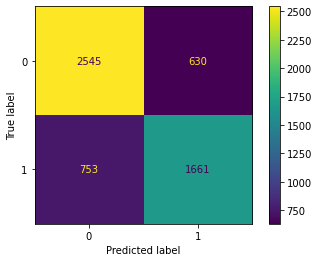

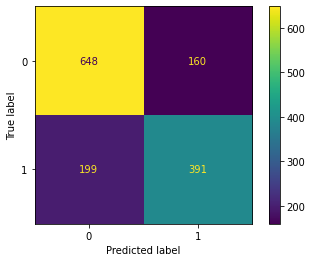

In [ ]:
# Logistic Regression Model

q3 = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'dec_o']
q3_predictors = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']
q3_df = df[q3]
q3_df.dropna(inplace = True)
q3_df.reset_index(inplace = True)

# perform a 80/20 split on the data
X_train, X_test, y_train, y_test = train_test_split(q3_df[q3_predictors], q3_df['dec_o'], test_size=0.2, random_state = 123)
# z-score
z = StandardScaler()
z.fit(X_train)

X_train[q3_predictors] = z.fit_transform(X_train[q3_predictors])
X_test[q3_predictors] = z.transform(X_test[q3_predictors])

# run a logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Accuracy an ROC AUC scores
train_prediction = lr.predict(X_train)
test_prediction = lr.predict(X_test)

lr_acc_train = accuracy_score(y_train, lr.predict(X_train))
lr_acc_test = accuracy_score(y_test, lr.predict(X_test))

lr_roc_train = roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])
lr_roc_test = roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])

print("----- Accuracy Score -----")
print("Train:", lr_acc_train)
print("Test:", lr_acc_test)
print("----- ROC AUC Score -----")
print("Train:", lr_roc_train)
print("Test:", lr_roc_test)
plot_confusion_matrix(lr, X_train, y_train)
plot_confusion_matrix(lr, X_test, y_test)

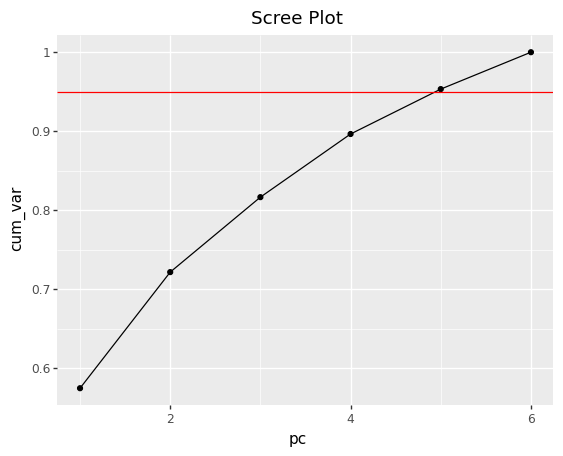

<ggplot: (8791217233803)>

In [ ]:
# PCA

pca = PCA()
pca.fit(X_train)

pcaDF = pd.DataFrame({"expl_var" :
                      pca.explained_variance_ratio_,
                      "pc": range(1,7),
                      "cum_var":
                      pca.explained_variance_ratio_.cumsum()})

# scree plot (with horizontal line for 95% explained variance)
(ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line(color = "black") +
 ggtitle("Scree Plot") +
 geom_point(color = "black") + geom_hline(yintercept = 0.95, color = "red"))

----- Component Scores -----
5 PCs Component Score (train): 0.7502236536052961
5 PCs Component Score (test): 0.740343347639485
----- Accuracy Score -----
Train: 0.7502236536052961
Test: 0.740343347639485
----- ROC AUC Score -----
Train: 0.8278939780414772
Test: 0.8084336717570061


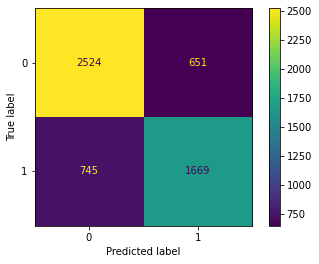

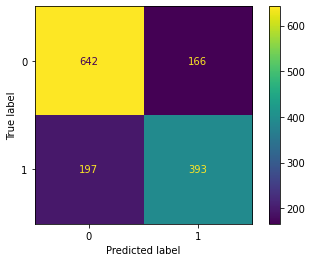

In [ ]:
# PCA (continued)
pcomps5_train = pca.transform(X_train)
pcomps5_train = pd.DataFrame(pcomps5_train[:,0:5])

pcomps5_test = pca.transform(X_test)
pcomps5_test = pd.DataFrame(pcomps5_test[:,0:5])

lr_pca = LogisticRegression()
lr_pca.fit(pcomps5_train, y_train)

# component scores
print("----- Component Scores -----")
print("5 PCs Component Score (train):", lr_pca.score(pcomps5_train, y_train))
print("5 PCs Component Score (test):", lr_pca.score(pcomps5_test, y_test))

# Accuracy an ROC AUC scores
train_prediction = lr_pca.predict(pcomps5_train)
test_prediction = lr_pca.predict(pcomps5_test)

pca_acc_train = accuracy_score(y_train, train_prediction)
pca_acc_test = accuracy_score(y_test, test_prediction)

pca_roc_train = roc_auc_score(y_train, lr_pca.predict_proba(pcomps5_train)[:,1])
pca_roc_test = roc_auc_score(y_test, lr_pca.predict_proba(pcomps5_test)[:,1])

print("----- Accuracy Score -----")
print("Train:", pca_acc_train)
print("Test:", pca_acc_test)
print("----- ROC AUC Score -----")
print("Train:", pca_roc_train)
print("Test:", pca_roc_test)
plot_confusion_matrix(lr_pca, pcomps5_train, y_train)
plot_confusion_matrix(lr_pca, pcomps5_test, y_test)

## b) Analysis

For this question, Logistic Regression models were used as they would be the most effective method for using continuous variables to predict a categorical outcome. In this case, using a partner's ratings about the person's attributes to determine the partner's decision.

First, a simple Logistic Regression model is fit and trained on all 7 attributes. The performance metrics for both the train and test sets consist of accuracy scores, ROC AUC scores, and confusion matrices. All of these metrics yielded very similar results between train and test, which means no overfitting occurred. With an accuracy score of about 0.74, this means that the model is capable of predicting a partner's decision 74% of the time. With an ROC AUC score of 0.81, this model is much better than a random model, which would have a score of 0.5.

In order to see if the dimensionality of this model could be reduced and help simplify computational complexity, PCA was used on a new Logistic Regression model. A goal of 95% explained variance was set, and after plotting the scree plot, it is clear to see that from the diagonal nature of the curve, each principal component captures nearly equally very little variance. This indicated that the original variables were not strongly correlated to each other. In fact, 5 components must be used to reach the 95% explained variance threshold. Even after reducing dimensionality, this model performed very similarly to the first Logistic Regression model, yielding nearly identical accuracy and ROC AUC scores, and confusion matrices. Additionally, there was no overfitting.

Though it may have been expected for the model using PCA to perform worse, it is likely due to the fact that most of the principal components were used that the models' performances were similar.

The metrics used to analyze the model were changed from our analysis plan. We originally said that MSE and R2 scores would be used. However, these metrics are not the best when analyzing logistic regression models. Instead, we used accuracy, ROC AUC score and confusion matrices to evaluate the success of the model. Another change that was made between the analysis plan and the actual analysis was that the two separate bar graphs of the accuracies for the two logistic regression models were combined into one bar graph to show the accuracies. This simplified the visualization of the data. We also added a bar graph of the ROC AUC scores for the two different models on the training and testing sets.

## c) Graphs

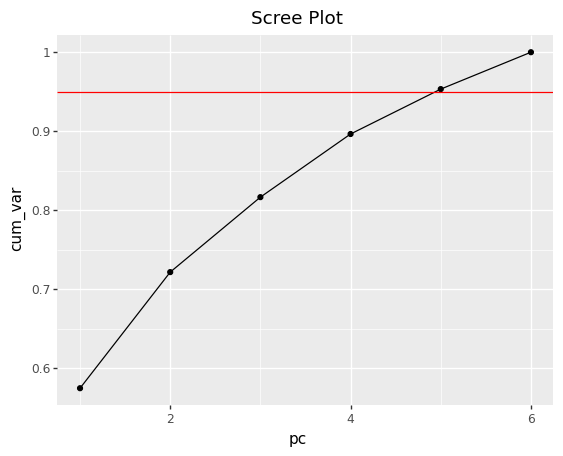

<ggplot: (8791216726842)>

In [ ]:
# scree plot (with horizontal line for 95% explained variance)
(ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line(color = "black") +
 ggtitle("Scree Plot") +
 geom_point(color = "black") + geom_hline(yintercept = 0.95, color = "red"))

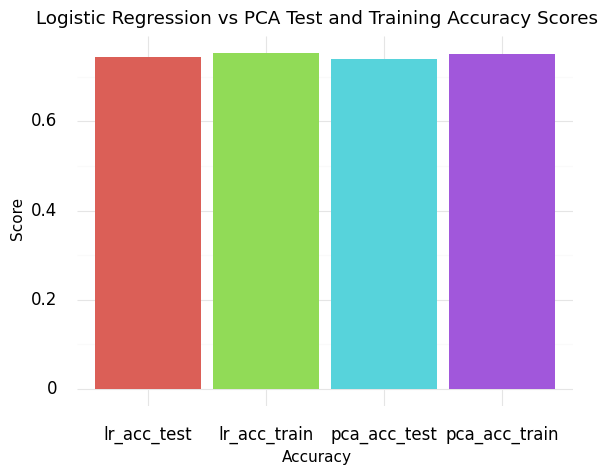

<ggplot: (8791217077417)>

In [ ]:
# LR vs PCA (Accuracy Scores)
acc_metrics = [lr_acc_train, lr_acc_test, pca_acc_train, pca_acc_test]
acc_df = pd.DataFrame({"Accuracy" : ["lr_acc_train", "lr_acc_test", "pca_acc_train", "pca_acc_test"], "Score" : acc_metrics})

(ggplot(acc_df, aes(x = "Accuracy", y = "Score", fill = "Accuracy")) + geom_bar(stat = "identity")
+ ggtitle("Logistic Regression vs PCA Test and Training Accuracy Scores") + theme_minimal() + theme(axis_text = element_text(size=12, color = "black"), legend_position = "none"))

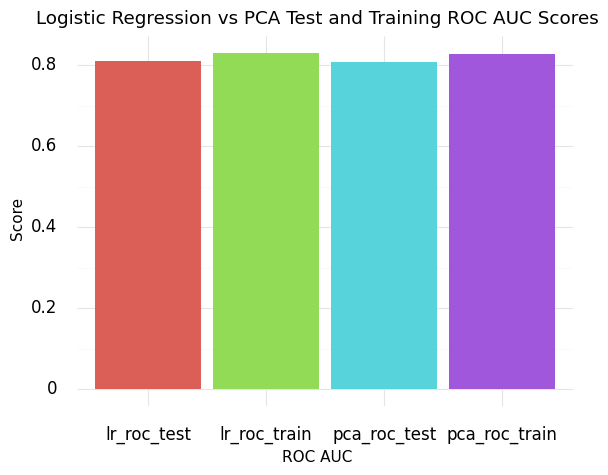

<ggplot: (8791220100163)>

In [ ]:
# LR vs PCA (ROC AUC Scores)
roc_metrics = [lr_roc_train, lr_roc_test, pca_roc_train, pca_roc_test]
roc_df = pd.DataFrame({"ROC AUC" : ["lr_roc_train", "lr_roc_test", "pca_roc_train", "pca_roc_test"], "Score" : roc_metrics})

(ggplot(roc_df, aes(x = "ROC AUC", y = "Score", fill = "ROC AUC")) + geom_bar(stat = "identity")
+ ggtitle("Logistic Regression vs PCA Test and Training ROC AUC Scores") + theme_minimal() + theme(axis_text = element_text(size=12, color = "black"), legend_position = "none"))

# Question 4: How did people’s self-rated interest (sports, tvsports, exercise, dining, museums, art, hiking, gaming, clubbing, reading, tv, theater, movies, concerts, music, shopping, yoga) affect their partner’s decision (decision_o)? Which interest had the greatest correlation with a match?

# a) Analysis Code

----- Accuracy Score -----
Train: 0.593161620726013
Test: 0.5891566265060241
----- ROC AUC Score -----
Train: 0.5825983372703238
Test: 0.588336286776332
       Coefs Predictors
2   0.143615   exercise
15  0.112913   shopping
8   0.100938   clubbing
0   0.097678     sports
3   0.091229     dining
6   0.041154     hiking
14  0.036454      music
5   0.029846        art
9   0.017737    reading
16  0.004381       yoga
11 -0.017864    theater
4  -0.040375    museums
13 -0.043221   concerts
10 -0.049647         tv
12 -0.054688     movies
1  -0.074456   tvsports
7  -0.103051     gaming


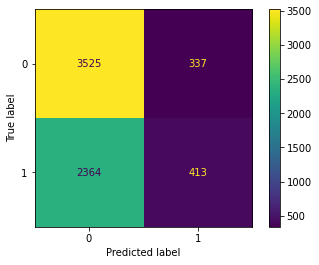

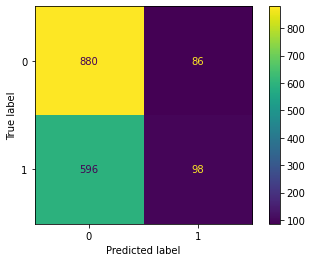

In [ ]:
# Part 1: "How did people's self-rated interest affect their partner's decision?"

# Logistic Regression Model

q4 = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'dec_o', 'match']
q4_predictors = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']
q4_df = df[q4]
q4_df.dropna(inplace = True)
q4_df.reset_index(inplace = True)

# perform a 80/20 split on the data
X_train, X_test, y_train, y_test = train_test_split(q4_df[q4_predictors], q4_df['dec_o'], test_size=0.2, random_state = 123)

# z-score
z = StandardScaler()
z.fit(X_train)

X_train[q4_predictors] = z.fit_transform(X_train[q4_predictors])
X_test[q4_predictors] = z.transform(X_test[q4_predictors])


# run a logistic regression
lr1 = LogisticRegression()
lr1.fit(X_train, y_train)

# Accuracy an ROC AUC scores
train_prediction = lr1.predict(X_train)
test_prediction = lr1.predict(X_test)

acc_train_dec = accuracy_score(y_train, lr1.predict(X_train))
acc_test_dec = accuracy_score(y_test, lr1.predict(X_test))

roc_train = roc_auc_score(y_train, lr1.predict_proba(X_train)[:,1])
roc_test = roc_auc_score(y_test, lr1.predict_proba(X_test)[:,1])

print("----- Accuracy Score -----")
print("Train:", acc_train_dec)
print("Test:", acc_test_dec)
print("----- ROC AUC Score -----")
print("Train:", roc_train)
print("Test:", roc_test)
plot_confusion_matrix(lr1, X_train, y_train)
plot_confusion_matrix(lr1, X_test, y_test)
coef1 = pd.DataFrame({"Coefs": lr1.coef_[0], "Predictors": q4_predictors})
coef1 = coef1.sort_values(by="Coefs", ascending=False)
print(coef1)

In [ ]:
# Part 2: "Which interest had the greatest correlation with a match?"

# perform a 80/20 split on the data
X_train, X_test, y_train, y_test = train_test_split(q4_df[q4_predictors], q4_df['match'], test_size=0.2, random_state = 123)
# z-score
z = StandardScaler()
z.fit(X_train)

X_train[q4_predictors] = z.fit_transform(X_train[q4_predictors])
X_test[q4_predictors] = z.transform(X_test[q4_predictors])

# run a logistic regression
lr2 = LogisticRegression()
lr2.fit(X_train, y_train)

# Accuracy an ROC AUC scores
train_prediction = lr2.predict(X_train)
test_prediction = lr2.predict(X_test)

acc_train_match = accuracy_score(y_train, lr2.predict(X_train))
acc_test_match = accuracy_score(y_test, lr2.predict(X_test))

roc_train = roc_auc_score(y_train, lr2.predict_proba(X_train)[:,1])
roc_test = roc_auc_score(y_test, lr2.predict_proba(X_test)[:,1])

print("----- Accuracy Score -----")
print("Train:", acc_train_match)
print("Test:", acc_test_match)
print("----- ROC AUC Score -----")
print("Train:", roc_train)
print("Test:", roc_test)

# get coefficients
coef = pd.DataFrame({"Coefs": lr2.coef_[0], "Predictors": q4_predictors})
coef = coef.sort_values(by="Coefs", ascending=False)
print(coef)

----- Accuracy Score -----
Train: 0.8362705226690766
Test: 0.8325301204819278
----- ROC AUC Score -----
Train: 0.573123155765412
Test: 0.5606786640152421
       Coefs Predictors
5   0.176512        art
8   0.154085   clubbing
9   0.093916    reading
16  0.071539       yoga
3   0.061836     dining
13  0.054055   concerts
0   0.053920     sports
10  0.026006         tv
6   0.024148     hiking
14  0.015147      music
7   0.012205     gaming
11  0.011237    theater
2   0.004933   exercise
1  -0.033498   tvsports
15 -0.045858   shopping
12 -0.132585     movies
4  -0.176208    museums


# b) Analysis

This question is divided into two parts. The first part determines how people's self-rated interests affect their partner's decision, while the second uses the same interest predictors to find which interest has the greatest correlation to a match. Both parts of these questions used Logistic Regression models, since each of the interest predictors are continuous variables, while both outcomes are categorical (decision_o and match). Both models were trained and tested using an 80/20 train-test split, and all predictors were z-scored.

For the first model, the performance metrics used were accuracy scores, ROC AUC scores, and confusion matrices generated for both train and test sets. Though the train and test set values are very similar and is therefore not overfitting, the results reveal that the model performs quite poorly. With an accuracy and ROC AUC score of around 0.58, this means that the model is only 8% better at predicting the outcome than a purely random selection. According to the confusion matrices, the model especially falls short in its exceedingly large number of false negatives, resulting in a recall score of 0.14. This means that often times using this model, an individual's partner will decide yes when the model says that they will decide no. For the model's purposes, I feel that this is a safer option than to have more false positives where people are surprised by rejection. Ultimately, this model found that the coefficient with the greatest magnitude was exercise, indicating a positive correlation where an increase of 1 standard deviation of exercise corresponded to an increase in the log odds of the partner's decision increasing by 14.3%.

For the second model, the ROC AUC score was slightly lower than the first, however the accuracy score was much higher, around 0.83. Though this difference is quite strange, the high accuracy score could possibly be due to an unevenly balanced number of 'yes' and 'no' decisions. If there were very few of one, it could result in the accuracy measures being skewed. The coefficients were also generated and sorted, and the most correlating coefficients were 'art' and 'museums', at 0.177 and -0.176 respectively. This means that with every unit increase in these art interest, there is an 18% increase in the log odds of a match being made. Equally, for a one unit decrease in museum interest, interestingly there is a 17.6% increase in the log odds of a match being made.

Similar to Question 3, the metrics used to analyze the model were changed from our analysis plan. We originally said that MSE and R2 scores would be used. However, these metrics are not the best when analyzing logistic regression models. Instead, we used accuracy to evaluate the success of the models. Another change that was made between the analysis plan and the actual analysis was the inclusion of the probability overlap graph for the first part of the question. This graph helps visualize the reasoning behind the poor performance of the model and show that the probabilities for each outcome are almost equal.

# c) Graphs

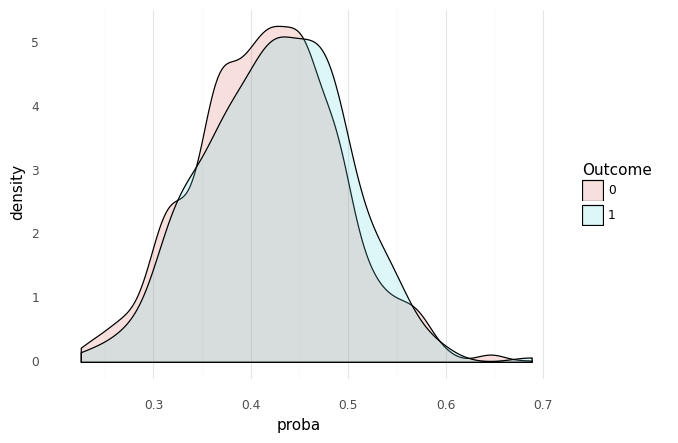

<ggplot: (8791217339266)>

In [ ]:
# Part 1: overlap plot
overlap_plot_df = pd.DataFrame({"proba": lr1.predict_proba(X_test)[:,1],
                                "outcome": y_test})

(ggplot(overlap_plot_df, aes(x = "proba", y = 1, fill = "factor(outcome)")) + geom_point() +
 theme_minimal() + ylim(0,2) +
 scale_fill_discrete(name = "Outcome") +
 theme(panel_grid_major_y = element_blank(),
       panel_grid_minor_y = element_blank()))

thresh = 0.3
(ggplot(overlap_plot_df, aes(x = "proba",  fill = "factor(outcome)")) + geom_density(alpha = 0.2) +
 theme_minimal() +
 scale_fill_discrete(name = "Outcome") +
 theme(panel_grid_major_y = element_blank(),
       panel_grid_minor_y = element_blank()))

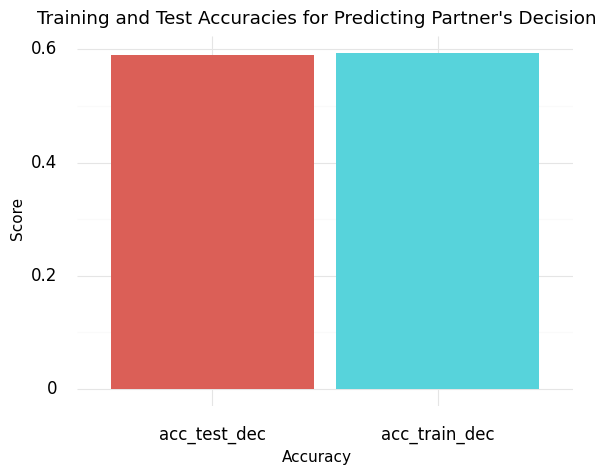

<ggplot: (8791216961118)>

In [ ]:
acc_metrics = [acc_train_dec, acc_test_dec]
acc_df = pd.DataFrame({"Accuracy" : ["acc_train_dec", "acc_test_dec"], "Score" : acc_metrics})

(ggplot(acc_df, aes(x = "Accuracy", y = "Score", fill = "Accuracy")) + geom_bar(stat = "identity")
+ ggtitle("Training and Test Accuracies for Predicting Partner's Decision") + theme_minimal() + theme(axis_text = element_text(size=12, color = "black"), legend_position = "none"))

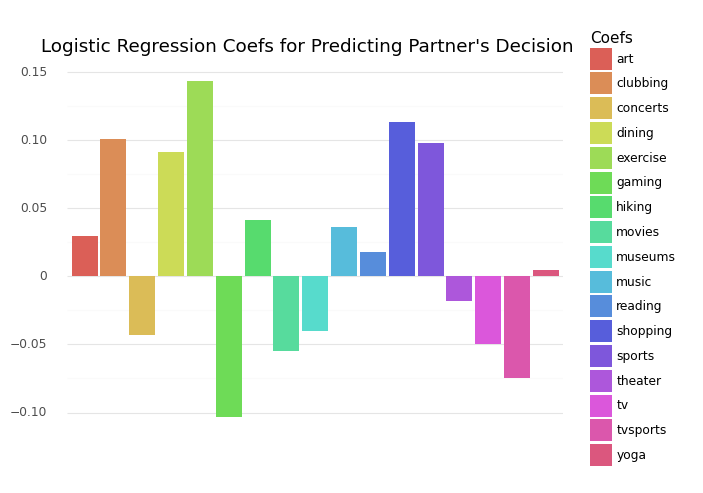

<ggplot: (8791217095801)>

In [ ]:
(ggplot(coef1, aes(x = "Predictors", y = "Coefs", fill = "Predictors" )) +
 ggtitle("Logistic Regression Coefs for Predicting Partner's Decision") +
 labs(x = "", y = "", fill = "Coefs") +
 geom_bar(stat = "identity") +
 theme_minimal() +
 theme(panel_grid_major_x = element_blank(),
      axis_text_x = element_blank()
      )
 )

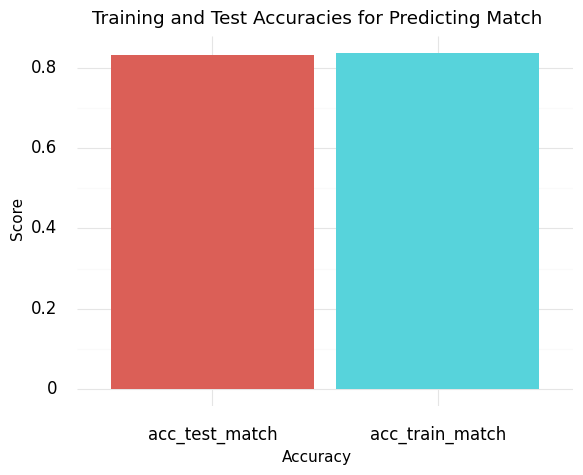

<ggplot: (8791216994967)>

In [ ]:
acc_metrics = [acc_train_match, acc_test_match]
acc_df = pd.DataFrame({"Accuracy" : ["acc_train_match", "acc_test_match"], "Score" : acc_metrics})

(ggplot(acc_df, aes(x = "Accuracy", y = "Score", fill = "Accuracy")) + geom_bar(stat = "identity")
+ ggtitle("Training and Test Accuracies for Predicting Match") + theme_minimal() + theme(axis_text = element_text(size=12, color = "black"), legend_position = "none"))

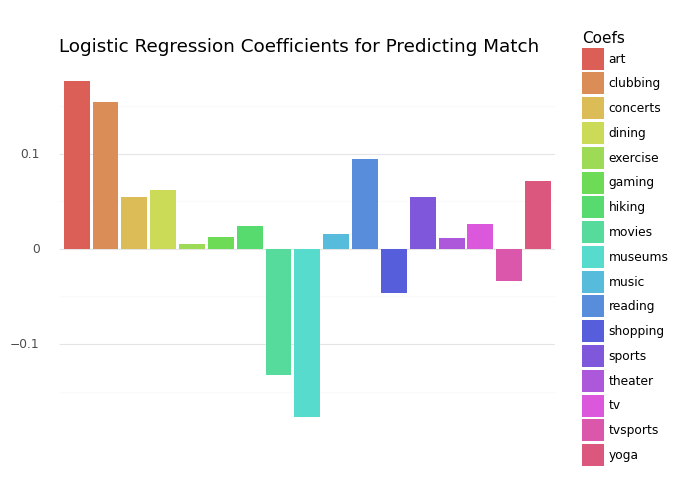

<ggplot: (8791216548027)>

In [ ]:
# Part 2: coefficients
(ggplot(coef, aes(x = "Predictors", y = "Coefs", fill = "Predictors" )) +
 ggtitle("Logistic Regression Coefficients for Predicting Match") +
 labs(x = "", y = "", fill = "Coefs") +
 geom_bar(stat = "identity") +
 theme_minimal() +
 theme(panel_grid_major_x = element_blank(),
      axis_text_x = element_blank()
      )
 )

In [ ]:
# Download as PDF with Jupyter Notebook

# doesn't show this cells output when downloading PDF
!pip install gwpy &> /dev/null

# installing necessary files
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

# installing pypandoc
!pip install pypandoc

# connecting your google drive
from google.colab import drive
drive.mount('/content/drive')

# copying your file over. Change "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!cp "drive/My Drive/Colab Notebooks/speeddating.ipynb" ./

# Again, replace "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!jupyter nbconvert --to PDF "speeddating.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
texlive is already the newest version (2017.20180305-1).
texlive-latex-extra is already the newest version (2017.20180305-2).
texlive-xetex is already the newest version (2017.20180305-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https: